In [17]:
#orange
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'  #No logging TF

import tensorflow as tf
import numpy as np
import time
from Generator import OmniglotGenerator
from numpy import *;
import random

other_class=0
nb_class =10+other_class
input_size = 784
img_size=(28,28)
batch_size_om = 16
nb_samples_per_class = 17
train_samples_per_class=1

train_samples=17
mb_size = 64

generator1 = OmniglotGenerator(data_folder='/home/pt/test1/data/omtrain', \
                               batch_size=batch_size_om, nb_samples=nb_class,\
                               nb_samples_per_class=nb_samples_per_class,\
                               max_rotation=0., max_shift=0.,img_size=img_size, max_iter=None,\
                               train_samples_per_class=train_samples_per_class)
x_test,y_test=generator1.sample(nb_class)

example_outputs = y_test.reshape(batch_size_om*nb_class*nb_samples_per_class,1)
example_input=x_test.reshape(batch_size_om*nb_class*nb_samples_per_class,784)

#test_others_input = np.zeros((batch_size_om *nb_samples_per_class*other_class,input_size))
#test_others_outputs  =np.zeros((batch_size_om *nb_samples_per_class*other_class,nb_class))

train_input=np.zeros((batch_size_om *train_samples*(nb_class-other_class),input_size))
train_outputs=np.zeros((batch_size_om *train_samples*(nb_class-other_class),nb_class))
jte=0
jtr=0
jto=0
for k in range (nb_class):
    for i in range (batch_size_om *nb_samples_per_class*nb_class):
        if example_outputs[i]==k:
            train_input[jtr]=example_input[i]
            train_outputs[jtr][k]=1
            jtr+=1
            
                

    
    
def getbatchtrain(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
    return batchtrain,labeltrain

def getbatchtrain2(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    batchtrain2=np.zeros((size,input_size))
    labeltrain2=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        jjj=idx_1/(batch_size_om*train_samples)
        idx_2 = random.randint(int(jjj)*(batch_size_om*train_samples),int(jjj+1)*(batch_size_om*train_samples)-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
        batchtrain2[i,:] = train_input[idx_2,:]
        labeltrain2[i,:]=train_outputs[idx_2,:]
    return batchtrain,labeltrain,batchtrain2,labeltrain2

z,_=getbatchtrain(64)
#z,_=getbatchone(10)
z.shape



(64, 784)

In [20]:
#CVAE2
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/home/pt/test1/ELM/data", one_hot=True)
# Parameters
learning_rate2 = 0.001
num_steps2 =160000
batch_size2 = 64
y_dim2=784
y_dim22=10
# Network Parameters
image_dim2= 784 # MNIST images are 28x28 pixels
hidden_dim20 = 512*2
hidden_dim2 = 512
hidden_dim22 = 512
hidden_dim23=256

latent_dim2 =2

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

def sample_c(m, n, ind=-1):
    c = np.zeros([m,n])
    for i in range(m):
        if ind<0:
            ind = np.random.randint(10)
        c[i,ind] = 1
    return c





In [21]:
# Variables
weights2 = {
     'encoder_h01': tf.Variable(glorot_init([y_dim2, hidden_dim2])), 
    'encoder_h02': tf.Variable(glorot_init([hidden_dim2, hidden_dim23])), 
    'encoder_h1': tf.Variable(glorot_init([image_dim2+hidden_dim23+y_dim22, hidden_dim2])), 
    'z_mean': tf.Variable(glorot_init([hidden_dim2, latent_dim2])),
    'z_std': tf.Variable(glorot_init([hidden_dim2, latent_dim2])),
    'decoder_h01': tf.Variable(glorot_init([y_dim2, hidden_dim2])),
    'decoder_h02': tf.Variable(glorot_init([hidden_dim2, hidden_dim23])),
    'decoder_h1': tf.Variable(glorot_init([latent_dim2+hidden_dim23+y_dim22, hidden_dim22])),
    'decoder_h2': tf.Variable(glorot_init([hidden_dim22, hidden_dim23])),
    'decoder_h3': tf.Variable(glorot_init([hidden_dim23, hidden_dim22])),

    'decoder_out': tf.Variable(glorot_init([hidden_dim22, image_dim2]))
}
biases2 = {
    'encoder_b01': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b02': tf.Variable(glorot_init([hidden_dim23])),
    'encoder_b1': tf.Variable(glorot_init([hidden_dim2])),
    'z_mean': tf.Variable(glorot_init([latent_dim2])),
    'z_std': tf.Variable(glorot_init([latent_dim2])),
    'decoder_b01': tf.Variable(glorot_init([hidden_dim2])),
    'decoder_b02': tf.Variable(glorot_init([hidden_dim23])),
    'decoder_b1': tf.Variable(glorot_init([hidden_dim22])),
    'decoder_b2': tf.Variable(glorot_init([hidden_dim23])),
    'decoder_b3': tf.Variable(glorot_init([hidden_dim22])),

    'decoder_out': tf.Variable(glorot_init([image_dim2]))
}

# Building the encoder
input_image2 = tf.placeholder(tf.float32, shape=[None, image_dim2])


y2 = tf.placeholder(tf.float32, shape=[None, y_dim2])
y22 = tf.placeholder(tf.float32, shape=[None, y_dim22])

encoder2 = tf.matmul(y2, weights2['encoder_h01']) + biases2['encoder_b01']
encoder2 = tf.nn.sigmoid(encoder2)
encoder2 = tf.matmul(encoder2, weights2['encoder_h02']) + biases2['encoder_b02']
encoder2 = tf.nn.sigmoid(encoder2)

encoder2 = tf.matmul(tf.concat([input_image2,encoder2,y22], 1), weights2['encoder_h1']) + biases2['encoder_b1']
encoder2 = tf.nn.tanh(encoder2)


z_mean2 = tf.matmul(encoder2, weights2['z_mean']) + biases2['z_mean']
z_std2 = tf.matmul(encoder2, weights2['z_std']) + biases2['z_std']

# Sampler: Normal (gaussian) random distribution
eps2 = tf.random_normal(tf.shape(z_std2), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z2 = z_mean2 + tf.exp(z_std2 / 2) * eps2

# Building the decoder (with scope to re-use these layers later)
decoder2 = tf.matmul(y2, weights2['decoder_h01']) + biases2['decoder_b01']
decoder2 = tf.nn.sigmoid(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h02']) + biases2['decoder_b02']
decoder2 = tf.nn.sigmoid(decoder2)

decoder2 = tf.matmul(tf.concat([z2,decoder2,y22], 1), weights2['decoder_h1']) + biases2['decoder_b1']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h2']) + biases2['decoder_b2']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h3']) + biases2['decoder_b3']
decoder2 = tf.nn.tanh(decoder2)

decoder2 = tf.matmul(decoder2, weights2['decoder_out']) + biases2['decoder_out']
decoder2 = tf.nn.sigmoid(decoder2)

# Define VAE Loss
def vae_loss2(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std2 - tf.square(z_mean2) - tf.exp(z_std2)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

loss_op2 = vae_loss2(decoder2, input_image2)
optimizer2 = tf.train.RMSPropOptimizer(learning_rate=learning_rate2)
train_op2 = optimizer2.minimize(loss_op2)


In [22]:
#CVAE
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/home/pt/test1/ELM/data", one_hot=True)
# Parameters
learning_rate = 0.001
num_steps =80000
batch_size = 64
y_dim=10
# Network Parameters
image_dim = 784 # MNIST images are 28x28 pixels
hidden_dim = 512
hidden2_dim = 256
hidden3_dim = 512*2
latent_dim = 2

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

# Variables
weights = {
    'encoder_h1': tf.Variable(glorot_init([image_dim+y_dim, hidden_dim])),
    'z_mean': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'z_std': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'decoder_h1': tf.Variable(glorot_init([latent_dim+y_dim, hidden_dim])),
    'decoder_h2': tf.Variable(glorot_init([hidden_dim, hidden2_dim])),
    'decoder_h3': tf.Variable(glorot_init([hidden2_dim, hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([hidden_dim, image_dim]))
}
biases = {
    'encoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'z_mean': tf.Variable(glorot_init([latent_dim])),
    'z_std': tf.Variable(glorot_init([latent_dim])),
    'decoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'decoder_b2': tf.Variable(glorot_init([hidden2_dim])),
    'decoder_b3': tf.Variable(glorot_init([hidden_dim])),

    'decoder_out': tf.Variable(glorot_init([image_dim]))
}

# Building the encoder
input_image = tf.placeholder(tf.float32, shape=[None, image_dim])
noise_VAE=tf.placeholder(tf.float32, shape=[None, image_dim])

y = tf.placeholder(tf.float32, shape=[None, y_dim])

encoder = tf.matmul(tf.concat([input_image,y], 1), weights['encoder_h1']) + biases['encoder_b1']
encoder = tf.nn.tanh(encoder)
z_mean = tf.matmul(encoder, weights['z_mean']) + biases['z_mean']
z_std = tf.matmul(encoder, weights['z_std']) + biases['z_std']

# Sampler: Normal (gaussian) random distribution
eps = tf.random_normal(tf.shape(z_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z = z_mean + tf.exp(z_std / 2) * eps

# Building the decoder (with scope to re-use these layers later)
decoder = tf.matmul(tf.concat([z,y], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h2']) + biases['decoder_b2']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h3']) + biases['decoder_b3']
decoder = tf.nn.tanh(decoder)

decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)

# Define VAE Loss
def vae_loss(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std - tf.square(z_mean) - tf.exp(z_std)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

loss_op = vae_loss(decoder, input_image)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initialize the variables (i.e. assign their default value)
#init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
#sess = tf.Session()

# Run the initializer
#sess.run(init)


In [23]:
sess = tf.Session()
saver = tf.train.Saver() 
sess.run(tf.global_variables_initializer())
#saver.restore(sess, "/home/pt/test1/omnist2/Utils/good-x1x2/drawmodel.ckpt")
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    #batch_x, _ = mnist.train.next_batch(batch_size)
    #yin=np.zeros((batch_size,y_dim))
    # Train
    
    #x_train1,_,x_train2,_=getbatchtraintest(64)
    #x_train1,x_train2=getbatchtraintest(64)
    #X_mb,y_mb= mnist.train.next_batch(64)
    
    #noiseG1_in=np.random.uniform(-0.2, 0.2, size=[300, 784])
    #y_sample[:, 2] = 1
    
    x_train2,y_train2=getbatchtrain(64)

    #Z_sample = sample_Z(64, Z_dim1)
    #samples = sess.run(G_sample, feed_dict={Z: Z_sample, y1:y_train2})
    feed_dict = {input_image: x_train2,y:y_train2}
    _, l = sess.run([train_op, loss_op], feed_dict=feed_dict)
    
        
  
    if i % 1000 == 0 or i == 1:
        print('Step %i, Loss: %f' % (i, l))
        

noise_input = tf.placeholder(tf.float32, shape=[None, latent_dim])
#y = tf.placeholder(tf.float32, shape=[None, y_dim])
# Rebuild the decoder to create image from noise
decoder = tf.matmul(tf.concat([noise_input,y], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h2']) + biases['decoder_b2']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h3']) + biases['decoder_b3']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)
n = 15
noise_dim=2
for i in range(1, num_steps2+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    #batch_x, _ = mnist.train.next_batch(batch_size)
    #yin=np.zeros((batch_size,y_dim))
    # Train
    
    #x_train1,_,x_train2,_=getbatchtraintest(64)
    #x_train1,x_train2=getbatchtraintest(64)
    #X_mb,y_mb= mnist.train.next_batch(64)
    yset=sample_c(32,y_dim22)
    #noiseG1_in=np.random.uniform(-0.25, 0.25, size=[64, 784])
    #y_sample[:, 2] = 1
    ztest = np.random.uniform(-1., 1., size=[32, noise_dim])
    x_train2,y_train2=getbatchtrain(32)
    g = sess.run(decoder, feed_dict={noise_input: ztest,y:y_train2 })
    #Z_sample = sample_Z(64, Z_dim1)
    #samples = sess.run(G_sample, feed_dict={Z: Z_sample, y1:y_train2})
    feed_dict = {input_image2: x_train2,y2:g,y22:yset}
    _, l = sess.run([train_op2, loss_op2], feed_dict=feed_dict)
    
    if i%100:
        #ztest = np.random.uniform(-1., 1., size=[64, noise_dim])
        yset=sample_c(32,y_dim22)
        X_mb,y_mb,X_mb2,y_mb2=getbatchtrain2(32)
 
        feed_dict = {input_image2: X_mb,y2:X_mb2,y22:yset}
        _, l = sess.run([train_op2, loss_op2], feed_dict=feed_dict)
        
    
    if i % 1000 == 0 or i == 1:
       
        print('Step %i, Loss: %f' % (i, l))


Step 1, Loss: 607.967041
Step 1000, Loss: 95.926956
Step 2000, Loss: 102.475578
Step 3000, Loss: 71.290916
Step 4000, Loss: 72.248154
Step 5000, Loss: 72.237556
Step 6000, Loss: 71.667542
Step 7000, Loss: 72.422058
Step 8000, Loss: 67.332779
Step 9000, Loss: 68.159195
Step 10000, Loss: 72.683914
Step 11000, Loss: 72.746582
Step 12000, Loss: 75.806969
Step 13000, Loss: 102.125595
Step 14000, Loss: 69.811310
Step 15000, Loss: 72.905899
Step 16000, Loss: 69.581139
Step 17000, Loss: 71.178406
Step 18000, Loss: 75.590668
Step 19000, Loss: 68.792740
Step 20000, Loss: 71.118469
Step 21000, Loss: 80.690186
Step 22000, Loss: 135.089325
Step 23000, Loss: 71.891029
Step 24000, Loss: 74.982529
Step 25000, Loss: 70.072617
Step 26000, Loss: 77.276703
Step 27000, Loss: 72.382271
Step 28000, Loss: 66.582550
Step 29000, Loss: 72.086983
Step 30000, Loss: 73.875671
Step 31000, Loss: 69.242538
Step 32000, Loss: 74.115875
Step 33000, Loss: 73.939064
Step 34000, Loss: 74.150703
Step 35000, Loss: 68.099625
S

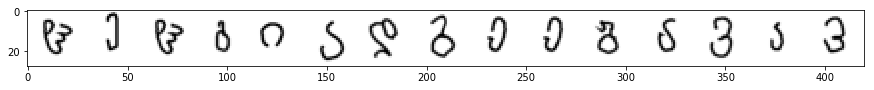

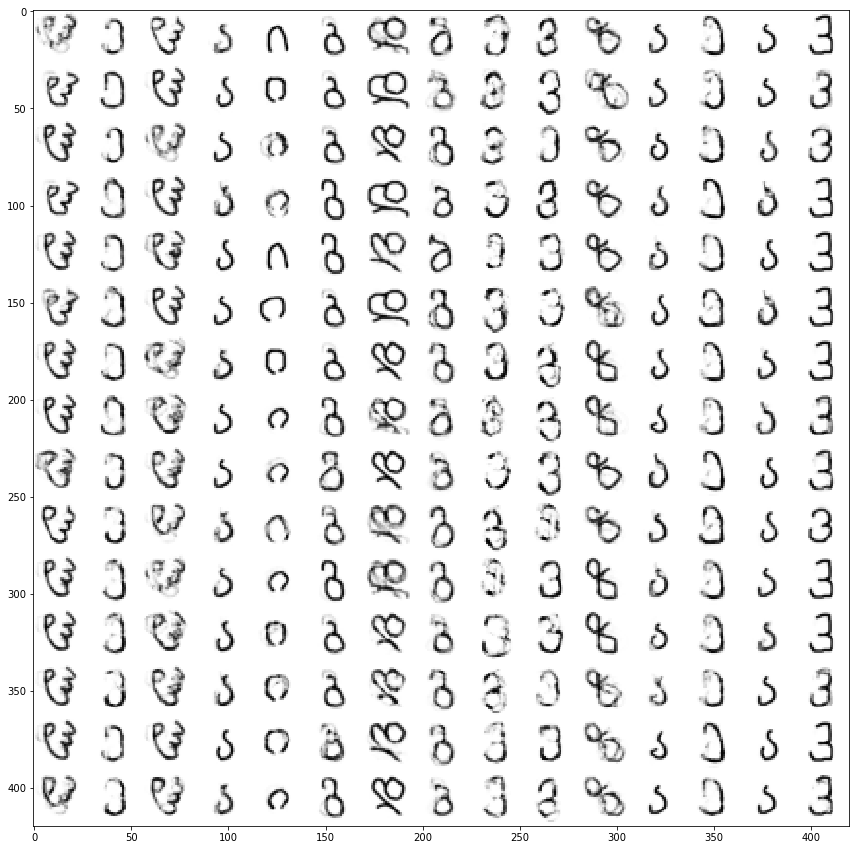

In [28]:

# Testing
# Generate images from noise, using the generator network.

noise_input2 = tf.placeholder(tf.float32, shape=[None, latent_dim2])
ysettest = tf.placeholder(tf.float32, shape=[None, y_dim22])
#y = tf.placeholder(tf.float32, shape=[None, y_dim])
# Rebuild the decoder to create image from noise

decoder2 = tf.matmul(y2, weights2['decoder_h01']) + biases2['decoder_b01']
decoder2 = tf.nn.sigmoid(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h02']) + biases2['decoder_b02']
decoder2 = tf.nn.sigmoid(decoder2)

decoder2 = tf.matmul(tf.concat([noise_input2,decoder2,ysettest], 1), weights2['decoder_h1']) + biases2['decoder_b1']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h2']) + biases2['decoder_b2']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h3']) + biases2['decoder_b3']
decoder2 = tf.nn.tanh(decoder2)

decoder2 = tf.matmul(decoder2, weights2['decoder_out']) + biases2['decoder_out']
decoder2 = tf.nn.sigmoid(decoder2)

n = 15
noise_dim=2
#y1, y11= getbatchtrain(n)
ysettestin=sample_c(n,y_dim22)

X_mb,y_mb=getbatchtrain(n)

#X_mb,y_mb,X_mb2,y_mb2=getbatchtrain2(n)
#y1=net1.predict(y11)
canvas_orig = np.empty((28 * 1, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(1):
    # MNIST test set8
    g = (X_mb + 1.) / 2.
    # Reverse colours for better display
    g = -1 * (g - 1)
    #g=np.dot(batch_x, np.transpose(net.beta)) 
    #g=np.dot(net2input,net.beta)
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] =g [j].reshape([28, 28])

for i in range(n):
    # Noise input.
    ztest = np.random.uniform(-1., 1., size=[n, noise_dim])
    #g1 = sess.run(decoder, feed_dict={noise_input: ztest,y:y_mb })
    #y1[:,9]=1
    # Generate image from noise.
    #decoder = np.dot(z, net4.beta) 
    #decoder= np.dot(decoder, net3.beta) 
    #decoder= np.dot(decoder, net2.beta) 
    g = sess.run(decoder2, feed_dict={noise_input2: ztest,y2:X_mb,ysettest:ysettestin })
    #g = net2.predict(z)
    #g= np.dot(z, net.beta) 
    # Rescale values to the original [0, 1] (from tanh -> [-1, 1])
    g = (g + 1.) / 2.
    # Reverse colours for better display
    g = -1 * (g - 1)
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [25]:
#orange-test
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'  #No logging TF

import tensorflow as tf
import numpy as np
import time
from Generator import OmniglotGenerator
from numpy import *;
import random

other_class=0
nb_class =10+other_class
input_size = 784
img_size=(28,28)
batch_size_om = 16
nb_samples_per_class = 3
train_samples_per_class=1

train_samples=3
mb_size = 64

generator1 = OmniglotGenerator(data_folder='/home/pt/test1/data/omtest', \
                               batch_size=batch_size_om, nb_samples=nb_class,\
                               nb_samples_per_class=nb_samples_per_class,\
                               max_rotation=0., max_shift=0.,img_size=img_size, max_iter=None,\
                               train_samples_per_class=train_samples_per_class)
x_test,y_test=generator1.sample(nb_class)

example_outputs = y_test.reshape(batch_size_om*nb_class*nb_samples_per_class,1)
example_input=x_test.reshape(batch_size_om*nb_class*nb_samples_per_class,784)

#test_others_input = np.zeros((batch_size_om *nb_samples_per_class*other_class,input_size))
#test_others_outputs  =np.zeros((batch_size_om *nb_samples_per_class*other_class,nb_class))

train_input=np.zeros((batch_size_om *train_samples*(nb_class-other_class),input_size))
train_outputs=np.zeros((batch_size_om *train_samples*(nb_class-other_class),nb_class))
jte=0
jtr=0
jto=0
for k in range (nb_class):
    for i in range (batch_size_om *nb_samples_per_class*nb_class):
        if example_outputs[i]==k:
            train_input[jtr]=example_input[i]
            train_outputs[jtr][k]=1
            jtr+=1           
    
def getbatchtrain(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
    return batchtrain,labeltrain

z,_=getbatchtrain(10)
#z,_=getbatchone(10)
z.shape



(10, 784)